In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./data/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Creamos un filtro para obtener solo los datos de David Warner

In [3]:
filt=(df['batsman']=='DA Warner')
df_warner=df[filt]
df_warner.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df_warner['dismissal_kind'].value_counts()


caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

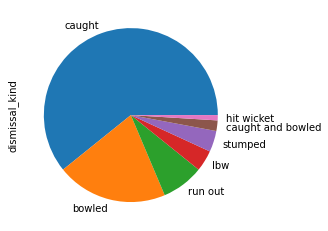

In [5]:
df_warner['dismissal_kind'].value_counts().plot.pie()
plt.savefig("./images/dimissal.png")

In [6]:
df_warner['batsman_runs'].value_counts()

0    1124
1     997
4     401
2     207
6     160
3      13
Name: batsman_runs, dtype: int64

¿Cuántos hay de valor 4?

In [7]:
len(df_warner[df_warner['batsman_runs']==4])

401

¿Cuántos hay de valor 6?

In [8]:
len(df_warner[df_warner['batsman_runs']==6])

160

Para calcular cualquier valor de los runs, hacemos una función.

In [9]:
def count_runs(df,runs):
    return (len(df_warner[df_warner['batsman_runs']==runs]))*runs
    

In [10]:
labels = [1,2,3,4,6]
slices = []
for run in labels:
    slices.append(count_runs(df_warner, run))
    

In [11]:
slices

[997, 414, 39, 1604, 960]

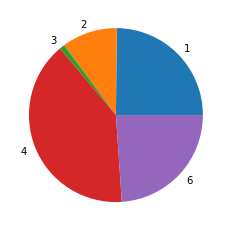

In [12]:
plt.pie(slices, labels = labels)
plt.savefig("./images/runs.png")

Pie en porcentajes

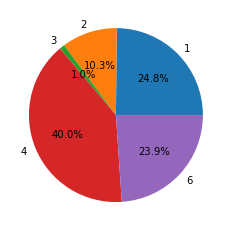

In [13]:
plt.pie(slices, labels = labels, autopct = '%1.1f%%')
plt.savefig("./images/runs_port.png")

# b ) Analizar cada equipo

In [14]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Obtenemos los nombre de los equipos y los sustituimos por la abreviaturas.

In [15]:
df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [16]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [17]:
df['batting_team'] = df['batting_team'].map(Teams)
df['bowling_team'] = df['bowling_team'].map(Teams)

In [18]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


distribución de puntos para equipos por entradas

In [19]:
df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum()

total_runs
match_id inning batting_team            
1        1      SRH                  207
         2      RCB                  172
2        1      MI                   184
         2      RPS                  187
3        1      GL                   183
...                                  ...
634      2      KKR                  140
635      1      GL                   162
         2      SRH                  163
636      1      SRH                  208
         2      RCB                  200

[1284 rows x 1 columns]

In [20]:
runs=df.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


In [21]:
runs.drop('match_id',axis=1,inplace=True)

In [22]:
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1279,2,KKR,140
1280,1,GL,162
1281,2,SRH,163
1282,1,SRH,208


In [23]:
runs['inning'].unique()

array([1, 2, 3, 4])

In [24]:
inning1 = runs[runs['inning'] == 1]
inning2 = runs[runs['inning'] == 2]

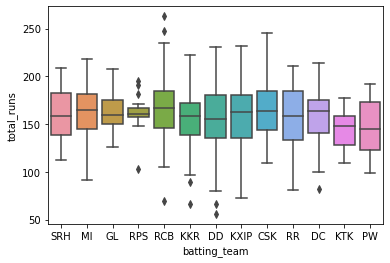

In [25]:
sns.boxplot(x = 'batting_team', y  = 'total_runs', data = inning1)
plt.savefig("./images/inn1")

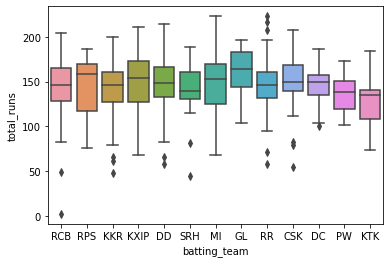

In [26]:
sns.boxplot(x = 'batting_team', y  = 'total_runs', data = inning2)
plt.savefig("./images/inn2")

# c)cuántas veces los equipos marcan más de 200

In [27]:
df.groupby(['match_id','inning','batting_team','bowling_team'])[['total_runs']].sum()

total_runs
match_id inning batting_team bowling_team            
1        1      SRH          RCB                  207
         2      RCB          SRH                  172
2        1      MI           RPS                  184
         2      RPS          MI                   187
3        1      GL           KKR                  183
...                                               ...
634      2      KKR          SRH                  140
635      1      GL           SRH                  162
         2      SRH          GL                   163
636      1      SRH          RCB                  208
         2      RCB          SRH                  200

[1284 rows x 1 columns]

Creamos el dataframe con los valores que vamos a usar.

In [28]:
score = df.groupby(['match_id','inning','batting_team','bowling_team'])[['total_runs']].sum().reset_index()

In [29]:
score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


Creamos un data donde los valores de `total_runs >200'

In [30]:
score_200 = score[score['total_runs']>=200]

In [31]:
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


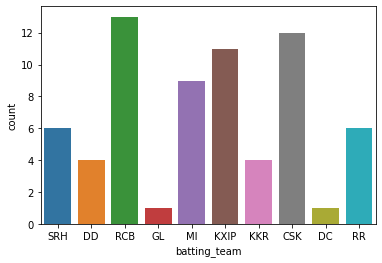

In [32]:
sns.countplot(score_200['batting_team'])
plt.savefig("./images/score_batting_200.png")

/home/patricia/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


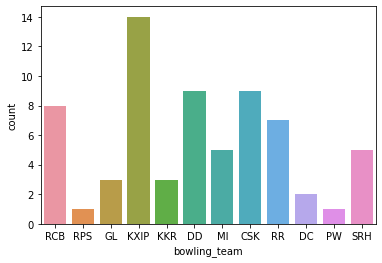

In [33]:
sns.countplot(score_200['bowling_team'])
plt.savefig("./images/score_bowling_200.png")

# d) Comparación de bateador

Creamos data con los bateadores y la veces que le dan a la bola

In [34]:
df.groupby(['batsman'])['ball'].count()

batsman
A Ashish Reddy     196
A Chandila           7
A Chopra            75
A Choudhary         20
A Flintoff          57
                  ... 
YV Takawale        183
Yashpal Singh       67
Younis Khan          7
Yuvraj Singh      2050
Z Khan             141
Name: ball, Length: 461, dtype: int64

In [35]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [36]:
balls = df.groupby(['batsman'])['ball'].count().reset_index()

In [37]:
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


Creamos data con los bateadores y la veces que hacen `runs`

In [39]:
runs=df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['batsman','runs']
runs

,batsman,runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [53]:
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls

,batsman,ball,runs_x,runs_y
0,A Ashish Reddy,196,280,280
1,A Chandila,7,4,4
2,A Chopra,75,53,53
3,A Choudhary,20,25,25
4,A Flintoff,57,62,62
...,...,...,...,...
456,YV Takawale,183,192,192
457,Yashpal Singh,67,47,47
458,Younis Khan,7,3,3
459,Yuvraj Singh,2050,2591,2591


Creamos un dataframe

In [41]:
four = df[df['batsman_runs'] == 4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SRH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SRH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SRH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SRH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [42]:
runs_4 = four.groupby('batsman')['batsman_runs'].count().reset_index()

In [43]:
runs_4.columns=['batsman','4s']
runs_4




,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [44]:
six=df.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
six.columns=['batsman','6s']
six

,batsman,6s
0,A Ashish Reddy,15
1,A Chandila,0
2,A Chopra,0
3,A Choudhary,1
4,A Flintoff,2
...,...,...
456,YV Takawale,3
457,Yashpal Singh,0
458,Younis Khan,0
459,Yuvraj Singh,141


Creamos el dataframe con los datos de casa jugador

In [45]:
player = pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1], six.iloc[:,1]],axis = 1)
player

,batsman,runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15
1,A Chandila,4,7,7.0,0
2,A Chopra,53,75,1.0,0
3,A Choudhary,25,20,5.0,1
4,A Flintoff,62,57,3.0,2
...,...,...,...,...,...
456,YV Takawale,192,183,NaN,3
457,Yashpal Singh,47,67,NaN,0
458,Younis Khan,3,7,NaN,0
459,Yuvraj Singh,2591,2050,NaN,141


Rellenemos con ceros los valores nulos de las columnas `4s` y  `6s`

In [46]:
player.fillna(0, inplace = True)

In [47]:
player

,batsman,runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15
1,A Chandila,4,7,7.0,0
2,A Chopra,53,75,1.0,0
3,A Choudhary,25,20,5.0,1
4,A Flintoff,62,57,3.0,2
...,...,...,...,...,...
456,YV Takawale,192,183,0.0,3
457,Yashpal Singh,47,67,0.0,0
458,Younis Khan,3,7,0.0,0
459,Yuvraj Singh,2591,2050,0.0,141


Calculamos los strike

In [48]:
player['strike_rate']=(player['runs']/player['ball'])*100
player

,batsman,runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15,142.857143
1,A Chandila,4,7,7.0,0,57.142857
2,A Chopra,53,75,1.0,0,70.666667
3,A Choudhary,25,20,5.0,1,125.000000
4,A Flintoff,62,57,3.0,2,108.771930
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,3,104.918033
457,Yashpal Singh,47,67,0.0,0,70.149254
458,Younis Khan,3,7,0.0,0,42.857143
459,Yuvraj Singh,2591,2050,0.0,141,126.390244


In [49]:
player.isna().sum()

batsman        0
runs           0
ball           0
4s             0
6s             0
strike_rate    0
dtype: int64

In [50]:
player['4s'].fillna(0,inplace=True)

In [51]:
player.isnull().values.any()

False

Obtener el máximo de runs de cada bateador

In [52]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [59]:
max_runs = grp.groupby('batsman')['batsman_runs'].max().reset_index()
max_runs.columns = ['batsman', 'max_runs']
max_runs

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


Concatenamos los dos dataframe

In [60]:
player_max = pd.concat([player, max_runs.iloc[:,1]], axis = 1)
player_max

,batsman,runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15,142.857143,36
1,A Chandila,4,7,7.0,0,57.142857,4
2,A Chopra,53,75,1.0,0,70.666667,24
3,A Choudhary,25,20,5.0,1,125.000000,15
4,A Flintoff,62,57,3.0,2,108.771930,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,3,104.918033,45
457,Yashpal Singh,47,67,0.0,0,70.149254,20
458,Younis Khan,3,7,0.0,0,42.857143,3
459,Yuvraj Singh,2591,2050,0.0,141,126.390244,83


 Obtener el top 10 de los bateadores

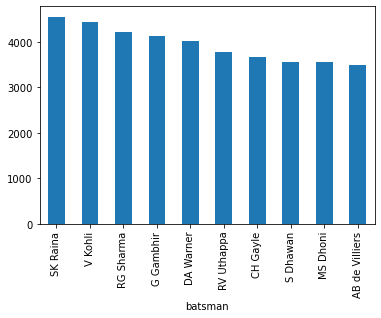

In [68]:
sum_runs = df.groupby('batsman')['batsman_runs'].sum()
sum_runs.sort_values(ascending=False)[:10].plot(kind = 'bar')
plt.savefig("./images/top_ten.png")

Mejores puntuaciones individuales cada bateador

In [72]:
player_sort = df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by = 'batsman_runs',ascending = False)
player_sort.head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


Crear data con los golpes

In [73]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [74]:
dimissal_kinds = ['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped',' it wicket']

In [76]:
hwt = df[df['dismissal_kind'].isin(dimissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


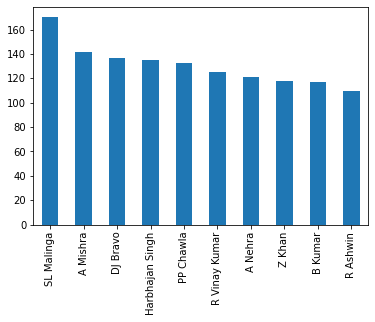

In [80]:
hwt['bowler'].value_counts()[:10].plot(kind = 'bar')
plt.savefig("./images/bowler_10.png")